# Machine-learning analysis - Balanced dataset - Total patients  - Only Hugo - p-value < 0.05 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [3]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_p005 = pd.read_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_ONLYHUGO_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.set_index(occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
occurrence_matrix_TNandNONTN_relgenes_p005_2 = occurrence_matrix_TNandNONTN_relgenes_p005.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
occurrence_matrix_TNandNONTN_relgenes_p005_2 = occurrence_matrix_TNandNONTN_relgenes_p005_2.rename(columns={'index': 'Patient'}, inplace=False)
occurrence_matrix_TNandNONTN_relgenes_p005_2

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1505,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1506,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()
columns_with_all_zeros

0

In [6]:
(occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [7]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_p005[['Target']]
patient_target

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_006,0
brca_smc_2018_BB01_008,0
...,...
MBCProject_xlhkS5CG,0
MBCProject_xoHAF6s8,0
MBCProject_yZSnSluK,0
MBCProject_ygcMFgCR,0


In [8]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_p005.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,KPNA6_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,KPNA6_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust


There aren't patients with zero mutations.

In [10]:
# load the patients you want to keep in the test set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
hugovariant_TNandNONTN_test_pts_p005 = pd.read_csv('Test_TNandNONTNpts_hugoVariant_p005.txt', sep=',', engine='python')
hugovariant_TNandNONTN_test_pts_p005

,Patient
0,BR-M-045
1,TCGA-A2-A0YE
2,TCGA-AN-A0AL
3,MBC_132
4,TCGA-OL-A5S0
...,...
141,MBC_72
142,MBC_183
143,MBC_199
144,MBCProject_LVSjf8h7


In [11]:
hugovariant_TNandNONTN_test_pts_p005_list = hugovariant_TNandNONTN_test_pts_p005['Patient'].to_list()
hugovariant_TNandNONTN_test_pts_p005_list

['BR-M-045',
 'TCGA-A2-A0YE',
 'TCGA-AN-A0AL',
 'MBC_132',
 'TCGA-OL-A5S0',
 'TCGA-E2-A573',
 'MBC_195',
 'MBC_182',
 'brca_smc_2018_BR301',
 'PD4252a',
 'TCGA-E9-A244',
 'TCGA-BH-A0BL',
 'TCGA-A7-A0CE',
 'brca_smc_2018_BR419',
 'TCGA-OL-A66I',
 'brca_smc_2018_BR105',
 'TCGA-E9-A243',
 'MBC_142',
 'TCGA-A2-A3Y0',
 'brca_smc_2018_BR097',
 'MBC_205',
 'TCGA-BH-A0AV',
 'MBC_85',
 'BR-M-122',
 'TCGA-E2-A14N',
 'MBC_26',
 'TCGA-A7-A0DA',
 'MBCProject_epUYsdCE',
 'TCGA-B6-A0I2',
 'MBC_67',
 'X11BR003',
 'TCGA-A2-A04P',
 'MBC_93',
 'MBC_215',
 'TCGA-AR-A0U0',
 'TCGA-A8-A07O',
 'TCGA-A2-A1G1',
 'TCGA-A2-A0T2',
 'BR-M-073',
 'TCGA-OL-A5RU',
 'X14BR014',
 'TCGA-BH-A18N',
 'TCGA-E2-A15F',
 'MBCProject_27uAugT4',
 'TCGA-C8-A12U',
 'MBC_178',
 'TCGA-E9-A1RE',
 'TCGA-BH-A18K',
 'brca_smc_2018_BR170',
 'TCGA-A2-A0T5',
 'MBCProject_7oIotZSe',
 'TCGA-EW-A1PD',
 'TCGA-A2-A0YC',
 'MBCProject_2kS5fYc1',
 'TCGA-GM-A2DN',
 'MBC_110',
 'X06BR005',
 'BR-V-051',
 'TCGA-A8-A09M',
 'TCGA-BH-A18F',
 'TCGA-A8-A08P

In [12]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_p005['Target'].value_counts()

In [13]:
class_count_0

1217

In [14]:
class_count_1

291

In [15]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (1217, 1072)
Target 1 - TN: (291, 1072)


In [16]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_006
3,brca_smc_2018_BB01_008
4,brca_smc_2018_BB01_009
...,...
1212,MBCProject_xlhkS5CG
1213,MBCProject_xoHAF6s8
1214,MBCProject_yZSnSluK
1215,MBCProject_ygcMFgCR


### Select the patients that you do not want to discard when balancing the datasets.

In [18]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, hugovariant_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_130
2,brca_smc_2018_BR170
3,brca_smc_2018_BR331
4,brca_smc_2018_BR371
...,...
68,MBCProject_2kS5fYc1
69,MBCProject_7oIotZSe
70,MBCProject_LVSjf8h7
71,MBCProject_pktAIxFb


In [19]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'BR-V-028',
 'BR-V-051',
 'BR-M-073',
 'PD3993a',
 'X01BR015',
 'X06BR005',
 'X11BR011',
 'X11BR014',
 'X11BR040',
 'X14BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0T5',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A08P',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A0TT',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0BZ',
 'TCGA-BH-A0H3',
 'TCGA-BH-A18F',
 'TCGA-BH-A18K',
 'TCGA-BH-A18N',
 'TCGA-BH-A18R',
 'TCGA-BH-A1FG',
 'TCGA-BH-A1FU',
 'TCGA-C8-A12U',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E2-A14V',
 'TCGA-E2-A15F',
 'TCGA-E9-A1R0',
 'TCGA-E9-A1RE',
 'TCGA-EW-A1PD',
 'TCGA-GM-A2DN',
 'TCGA-OL-A5D8',
 

### Select the occurrence matrix associated to these 73 NON TN patients 

In [20]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix = NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1213,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1214,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# extract the 73 NON TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_130,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR170,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BR331,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,MBCProject_2kS5fYc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,MBCProject_7oIotZSe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,MBCProject_pktAIxFb,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR170,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pktAIxFb,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create the NON TN occurrence matrix without the 73 patients to keep

In [23]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list)]
class_0_new

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1213,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1214,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Triple-Negative patients 
class_1

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_022
2,brca_smc_2018_BB01_026
3,brca_smc_2018_BB01_035
4,brca_smc_2018_BB01_037
...,...
286,MBCProject_lQtMtjFR
287,MBCProject_oqupfDu7
288,MBCProject_pMcWcrtZ
289,MBCProject_rJHBiKTl


In [26]:
TN_pts_tokeep= pd.merge(TN_patient_df, hugovariant_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_119
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BR097
...,...
68,MBC_205
69,MBC_215
70,MBCProject_d5CbUNTb
71,MBCProject_epUYsdCE


In [27]:
TN_pts_tokeep_list = TN_pts_tokeep['Patient'].tolist()
TN_pts_tokeep_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [28]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list
total_pts_to_keep

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [29]:
len(total_pts_to_keep)

146

##  Guided Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [30]:
# load the training patients from hugo+variant (p<0.05) dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
hugovariant_TNandNONTN_training_pts_p005 = pd.read_csv('Training_TNandNONTNpts_hugoVariant_p005.txt', sep=',', engine='python')
hugovariant_TNandNONTN_training_pts_p005

,Patient
0,BR-V-044
1,TCGA-C8-A12Y
2,brca_smc_2018_BR114
3,TCGA-A2-A0EM
4,TCGA-A8-A07W
...,...
431,MBCProject_QJFdf8hQ
432,MBCProject_lQtMtjFR
433,MBCProject_pMcWcrtZ
434,MBCProject_rJHBiKTl


In [31]:
# load the training patients from the 4A experiment
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
training_pts_4A = pd.read_csv('Training_TNandNONTNpts_onlyhugo_q1.txt', sep=',', engine='python')
training_pts_4A

,Patient
0,TCGA-AO-A0JB
1,TCGA-BH-A0DZ
2,PD4128a
3,PD4203a
4,TCGA-BH-A0BD
...,...
425,MBCProject_QJFdf8hQ
426,MBCProject_lQtMtjFR
427,MBCProject_pMcWcrtZ
428,MBCProject_rJHBiKTl


In [32]:
training_pts_4A.loc[training_pts_4A['Patient']=='brca_smc_2018_BB01_110']

,Patient
229,brca_smc_2018_BB01_110


In [33]:
training_pts_4A[training_pts_4A['Patient'] == 'brca_smc_2018_BB01_110'].index

Index([229], dtype='int64')

In [34]:
# drop the patient that is already present in the test set of 1A
training_pts_4A = training_pts_4A.drop(229)
training_pts_4A

,Patient
0,TCGA-AO-A0JB
1,TCGA-BH-A0DZ
2,PD4128a
3,PD4203a
4,TCGA-BH-A0BD
...,...
425,MBCProject_QJFdf8hQ
426,MBCProject_lQtMtjFR
427,MBCProject_pMcWcrtZ
428,MBCProject_rJHBiKTl


In [35]:
training_pts_4A_list = training_pts_4A['Patient'].to_list()
training_pts_4A_list

['TCGA-AO-A0JB',
 'TCGA-BH-A0DZ',
 'PD4128a',
 'PD4203a',
 'TCGA-BH-A0BD',
 'TCGA-E9-A22E',
 'MBC_118',
 'TCGA-E9-A22H',
 'X11BR031',
 'TCGA-D8-A1X5',
 'brca_smc_2018_BR107',
 'brca_smc_2018_BR206',
 'MBCProject_kzuMSZIW',
 'X18BR009',
 'MBC_17',
 'PD4076a',
 'BR-V-070',
 'TCGA-AN-A0G0',
 'TCGA-A2-A0CS',
 'MBCProject_5gHasou8',
 'TCGA-AN-A0AJ',
 'MBC_154',
 'TCGA-V7-A7HQ',
 'TCGA-D8-A13Z',
 'TCGA-A8-A095',
 'TCGA-BH-A0B1',
 'TCGA-E2-A155',
 'X20BR002',
 'TCGA-GM-A2DL',
 'TCGA-E2-A1L7',
 'TCGA-BH-A0DD',
 'TCGA-D8-A1JD',
 'X01BR030',
 'TCGA-EW-A1P5',
 'BR-V-037',
 'TCGA-AN-A0FT',
 'TCGA-BH-A0EE',
 'TCGA-AN-A049',
 'brca_smc_2018_BB01_023',
 'TCGA-LL-A740',
 'brca_smc_2018_BB01_120',
 'TCGA-C8-A26Y',
 'TCGA-AR-A0U3',
 'BR-M-120',
 'brca_smc_2018_BB01_111',
 'TCGA-A8-A096',
 'TCGA-C8-A130',
 'brca_smc_2018_BR205',
 'MBCProject_yZSnSluK',
 'TCGA-C8-A12Z',
 'TCGA-B6-A0I8',
 'TCGA-GM-A2DK',
 'TCGA-D8-A27L',
 'MBCProject_ErfKfJt0',
 'PD4001a',
 'TCGA-A2-A0CU',
 'MBCProject_EWubi6hd',
 'PD4104a

In [36]:
# study the intersection between the training patients from 1A and 4A
pd.merge(hugovariant_TNandNONTN_training_pts_p005, training_pts_4A, how='inner', on=['Patient'])

,Patient
0,TCGA-B6-A0WZ
1,MBC_200
2,PD3858a
3,PD4076a
4,X11BR018
...,...
261,MBCProject_QJFdf8hQ
262,MBCProject_lQtMtjFR
263,MBCProject_pMcWcrtZ
264,MBCProject_rJHBiKTl


In [37]:
hugovariant_TNandNONTN_training_pts_p005_list = hugovariant_TNandNONTN_training_pts_p005['Patient'].to_list()
hugovariant_TNandNONTN_training_pts_p005_list

['BR-V-044',
 'TCGA-C8-A12Y',
 'brca_smc_2018_BR114',
 'TCGA-A2-A0EM',
 'TCGA-A8-A07W',
 'TCGA-AO-A0JD',
 'BR-V-049',
 'TCGA-BH-A204',
 'TCGA-E9-A1R4',
 'TCGA-B6-A0WS',
 'BR-M-034',
 'TCGA-AO-A03P',
 'TCGA-AR-A24Z',
 'TCGA-E2-A15C',
 'TCGA-B6-A0WZ',
 'TCGA-GM-A2DC',
 'TCGA-BH-A1FH',
 'MBCProject_gdIlF4hG',
 'brca_smc_2018_BB01_081',
 'TCGA-E2-A154',
 'TCGA-S3-AA12',
 'X11BR050',
 'BR-M-047',
 'MBC_200',
 'PD3858a',
 'TCGA-EW-A6SD',
 'TCGA-BH-A0W4',
 'TCGA-C8-A1HF',
 'TCGA-A2-A4S3',
 'MBC_7',
 'X11BR022',
 'MBC_165',
 'PD4076a',
 'PD3986a',
 'BR-V-022',
 'MBCProject_MvhNc7Cd',
 'TCGA-AR-A255',
 'X11BR018',
 'TCGA-B6-A0RN',
 'TCGA-AR-A1AP',
 'MBC_203',
 'X11BR028',
 'PD4094a',
 'TCGA-S3-AA14',
 'brca_smc_2018_BB01_108',
 'TCGA-3C-AALK',
 'TCGA-A8-A08B',
 'MBC_136',
 'TCGA-BH-A203',
 'MBCProject_3vhkhAcY',
 'X11BR030',
 'MBC_57',
 'PD4938a',
 'brca_smc_2018_BB01_010',
 'brca_smc_2018_BR248',
 'TCGA-BH-A0DQ',
 'X22BR005',
 'MBC_202',
 'TCGA-S3-A6ZF',
 'MBC_40',
 'MBC_34',
 'MBC_46',
 'brca

In [38]:
# initial occurrence matrix
occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
occurrence_matrix_TNandNONTN_relgenes_p005_2 = occurrence_matrix_TNandNONTN_relgenes_p005.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
occurrence_matrix_TNandNONTN_relgenes_p005_2=occurrence_matrix_TNandNONTN_relgenes_p005_2.rename(columns={'index': 'Patient'}, inplace=False)
occurrence_matrix_TNandNONTN_relgenes_p005_2

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1505,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1506,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# create the training set 
occurrence_matrix_TNandNONTN_relgenes_p005_2_training = pd.merge(training_pts_4A, occurrence_matrix_TNandNONTN_relgenes_p005_2, how='inner', on=['Patient'])
occurrence_matrix_TNandNONTN_relgenes_p005_2_training

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
425,MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
427,MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_p005_2_training['Target'].value_counts())

total class of 1 and 0: Target
0    215
1    214
Name: count, dtype: int64


I have to add to the training set 3 NON TN patients and 4 TN patients.

In [42]:
hugovariant_TNandNONTN_test_pts_p005

,Patient
0,BR-M-045
1,TCGA-A2-A0YE
2,TCGA-AN-A0AL
3,MBC_132
4,TCGA-OL-A5S0
...,...
141,MBC_72
142,MBC_183
143,MBC_199
144,MBCProject_LVSjf8h7


In [43]:
test_pts_1A_list = hugovariant_TNandNONTN_test_pts_p005['Patient'].to_list()
test_pts_1A_list

['BR-M-045',
 'TCGA-A2-A0YE',
 'TCGA-AN-A0AL',
 'MBC_132',
 'TCGA-OL-A5S0',
 'TCGA-E2-A573',
 'MBC_195',
 'MBC_182',
 'brca_smc_2018_BR301',
 'PD4252a',
 'TCGA-E9-A244',
 'TCGA-BH-A0BL',
 'TCGA-A7-A0CE',
 'brca_smc_2018_BR419',
 'TCGA-OL-A66I',
 'brca_smc_2018_BR105',
 'TCGA-E9-A243',
 'MBC_142',
 'TCGA-A2-A3Y0',
 'brca_smc_2018_BR097',
 'MBC_205',
 'TCGA-BH-A0AV',
 'MBC_85',
 'BR-M-122',
 'TCGA-E2-A14N',
 'MBC_26',
 'TCGA-A7-A0DA',
 'MBCProject_epUYsdCE',
 'TCGA-B6-A0I2',
 'MBC_67',
 'X11BR003',
 'TCGA-A2-A04P',
 'MBC_93',
 'MBC_215',
 'TCGA-AR-A0U0',
 'TCGA-A8-A07O',
 'TCGA-A2-A1G1',
 'TCGA-A2-A0T2',
 'BR-M-073',
 'TCGA-OL-A5RU',
 'X14BR014',
 'TCGA-BH-A18N',
 'TCGA-E2-A15F',
 'MBCProject_27uAugT4',
 'TCGA-C8-A12U',
 'MBC_178',
 'TCGA-E9-A1RE',
 'TCGA-BH-A18K',
 'brca_smc_2018_BR170',
 'TCGA-A2-A0T5',
 'MBCProject_7oIotZSe',
 'TCGA-EW-A1PD',
 'TCGA-A2-A0YC',
 'MBCProject_2kS5fYc1',
 'TCGA-GM-A2DN',
 'MBC_110',
 'X06BR005',
 'BR-V-051',
 'TCGA-A8-A09M',
 'TCGA-BH-A18F',
 'TCGA-A8-A08P

In [44]:
pts_to_discard = test_pts_1A_list + training_pts_4A_list
len(pts_to_discard)

575

In [45]:
occurrence_matrix_TNandNONTN_relgenes_p005_2

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_004,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1505,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1506,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# new matrix from which to pick the training patients
remaining_pts = occurrence_matrix_TNandNONTN_relgenes_p005_2[~occurrence_matrix_TNandNONTN_relgenes_p005_2['Patient'].isin(pts_to_discard)]
remaining_pts

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1500,MBCProject_wAiri7fp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1502,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
remaining_pts.loc[remaining_pts['Target']==1]

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
84,brca_smc_2018_BR078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
514,TCGA-A2-A3XU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1039,TCGA-E2-A1LI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1211,MBC_127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
pts_to_add_training = ['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_005', 'MBCProject_ygcMFgCR', 'brca_smc_2018_BR078', 'TCGA-A2-A3XU', 'TCGA-E2-A1LI', 'MBC_127']
pts_to_add_training_df = remaining_pts[remaining_pts['Patient'].isin(pts_to_add_training)]
pts_to_add_training_df

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,brca_smc_2018_BR078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
514,TCGA-A2-A3XU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1039,TCGA-E2-A1LI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1211,MBC_127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1506,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# CORRECTED TRAINING DATASET
occurrence_matrix_TNandNONTN_relgenes_p005_2_training = pd.concat([occurrence_matrix_TNandNONTN_relgenes_p005_2_training, pts_to_add_training_df], axis=0)
occurrence_matrix_TNandNONTN_relgenes_p005_2_training

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,brca_smc_2018_BR078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
514,TCGA-A2-A3XU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1039,TCGA-E2-A1LI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1211,MBC_127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
training_pts_1A_DEF = occurrence_matrix_TNandNONTN_relgenes_p005_2_training['Patient'].to_list()

In [51]:
occurrence_matrix_TNandNONTN_relgenes_p005_2_training['Target'].value_counts()

Target
0    218
1    218
Name: count, dtype: int64

In [52]:
# create the test set 
occurrence_matrix_TNandNONTN_relgenes_p005_2_test = pd.merge(hugovariant_TNandNONTN_test_pts_p005, occurrence_matrix_TNandNONTN_relgenes_p005_2, how='inner', on=['Patient'])
occurrence_matrix_TNandNONTN_relgenes_p005_2_test

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,BR-M-045,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,TCGA-AN-A0AL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,MBC_132,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,MBC_72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,MBC_183,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,MBC_199,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_p005_2_test['Target'].value_counts())

total class of 1 and 0: Target
1    73
0    73
Name: count, dtype: int64


In [54]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = pd.concat([occurrence_matrix_TNandNONTN_relgenes_p005_2_training, occurrence_matrix_TNandNONTN_relgenes_p005_2_test], axis=0)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,Patient,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,MBC_72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,MBC_183,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,MBC_199,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.set_index('Patient', inplace=True)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.name=None
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,CTCF_283_288,GATA3_308_335,...,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,SPG21_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    291
1    291
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

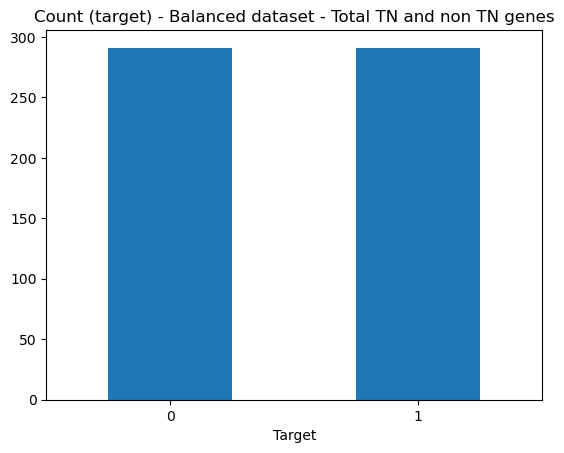

In [56]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [57]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.sum(axis=0)

TP53_270_282         50
GATA3_406_408         5
MAML3_503_503         3
AKT1_17_17           16
MYL10_26_26           5
                   ... 
PFDN5_noClust         2
CCNT2_noClust         1
CSN2_noClust          1
KRTAP5-1_noClust      1
Target              291
Length: 1072, dtype: int64

In [58]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [59]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all()
columns_with_all_zero

TP53_270_282        False
GATA3_406_408       False
MAML3_503_503       False
AKT1_17_17          False
MYL10_26_26         False
                    ...  
PFDN5_noClust       False
CCNT2_noClust       False
CSN2_noClust        False
KRTAP5-1_noClust    False
Target              False
Length: 1072, dtype: bool

In [60]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all().sum()

34

There are 34 columns containing all zero values.

In [61]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.eq(0).all()]
columns_to_drop

Index(['CTCF_283_288', 'DAP3_331_331', 'ZNF19_280_280', 'MAP4K3_395_415',
       'DDX5_134_141', 'RCC2_271_278', 'ZNF207_noClust', 'C5orf48_noClust',
       'FGF18_noClust', 'GPHA2_noClust', 'MAP4K3_noClust', 'AZIN1_noClust',
       'KRTAP1-3_noClust', 'OR2B6_noClust', 'ZNF672_noClust', 'CELA3B_noClust',
       'MFGE8_noClust', 'C6orf136_noClust', 'HSPA5_noClust', 'SLC20A2_noClust',
       'SRSF11_noClust', 'CD300LF_noClust', 'FIGNL1_noClust', 'ELMOD3_noClust',
       'SPPL2A_noClust', 'MC4R_noClust', 'TXNL4A_noClust', 'ASB4_noClust',
       'TTC16_noClust', 'DRG2_noClust', 'DIMT1_noClust', 'UBE2V2_noClust',
       'KPNA6_noClust', 'SPG21_noClust'],
      dtype='object')

In [62]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_BALANCED_onlyHugo.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

### Manually split the data in training set and test set 

In [64]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(training_pts_1A_DEF)]
train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-A2-A3XU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-E2-A1LI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBC_127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
y_train = train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y_train

TCGA-AO-A0JB           0
TCGA-BH-A0DZ           0
PD4128a                0
PD4203a                0
TCGA-BH-A0BD           0
                      ..
brca_smc_2018_BR078    1
TCGA-A2-A3XU           1
TCGA-E2-A1LI           1
MBC_127                1
MBCProject_ygcMFgCR    0
Name: Target, Length: 436, dtype: int64

In [68]:
X_train = train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X_train

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A3XU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A1LI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(hugovariant_TNandNONTN_test_pts_p005_list)]
test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-AN-A0AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBC_132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.to_list()

['BR-M-045',
 'TCGA-A2-A0YE',
 'TCGA-AN-A0AL',
 'MBC_132',
 'TCGA-OL-A5S0',
 'TCGA-E2-A573',
 'MBC_195',
 'MBC_182',
 'brca_smc_2018_BR301',
 'PD4252a',
 'TCGA-E9-A244',
 'TCGA-BH-A0BL',
 'TCGA-A7-A0CE',
 'brca_smc_2018_BR419',
 'TCGA-OL-A66I',
 'brca_smc_2018_BR105',
 'TCGA-E9-A243',
 'MBC_142',
 'TCGA-A2-A3Y0',
 'brca_smc_2018_BR097',
 'MBC_205',
 'TCGA-BH-A0AV',
 'MBC_85',
 'BR-M-122',
 'TCGA-E2-A14N',
 'MBC_26',
 'TCGA-A7-A0DA',
 'MBCProject_epUYsdCE',
 'TCGA-B6-A0I2',
 'MBC_67',
 'X11BR003',
 'TCGA-A2-A04P',
 'MBC_93',
 'MBC_215',
 'TCGA-AR-A0U0',
 'TCGA-A8-A07O',
 'TCGA-A2-A1G1',
 'TCGA-A2-A0T2',
 'BR-M-073',
 'TCGA-OL-A5RU',
 'X14BR014',
 'TCGA-BH-A18N',
 'TCGA-E2-A15F',
 'MBCProject_27uAugT4',
 'TCGA-C8-A12U',
 'MBC_178',
 'TCGA-E9-A1RE',
 'TCGA-BH-A18K',
 'brca_smc_2018_BR170',
 'TCGA-A2-A0T5',
 'MBCProject_7oIotZSe',
 'TCGA-EW-A1PD',
 'TCGA-A2-A0YC',
 'MBCProject_2kS5fYc1',
 'TCGA-GM-A2DN',
 'MBC_110',
 'X06BR005',
 'BR-V-051',
 'TCGA-A8-A09M',
 'TCGA-BH-A18F',
 'TCGA-A8-A08P

In [71]:
len(test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.to_list())

146

In [72]:
y_test = test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y_test

BR-M-045               1
TCGA-A2-A0YE           1
TCGA-AN-A0AL           1
MBC_132                1
TCGA-OL-A5S0           1
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 146, dtype: int64

In [73]:
X_test = test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X_test

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['FOXA1_254_268', 'ESR1_537_538', 'ITPKB_noClust', 'CD33_noClust',
       'KLHDC2_noClust', 'ICOSLG_noClust', 'MSH2_noClust', 'ABCG2_noClust',
       'TBC1D21_noClust', 'PSMD5_noClust', 'PRKCZ_noClust', 'GLS_noClust',
       'EWSR1_noClust', 'NBL1_noClust', 'IL24_noClust', 'GLG1_noClust',
       'ST3GAL6_noClust', 'NME5_noClust', 'P2RY8_noClust', 'F2RL2_noClust',
       'CYP46A1_noClust', 'M6PR_noClust', 'KCNH4_noClust', 'EIF2AK2_noClust',
       'MBOAT1_noClust', 'OMD_noClust', 'CPSF7_noClust', 'GAMT_noClust',
       'SMTNL2_noClust', 'TMEM189-UBE2V1_noClust', 'WBP11_noClust',
       'VAMP1_noClust', 'RAB21_noClust', 'AP1S3_noClust', 'OR6B1_noClust',
       'KHDC1_noClust', 'EIF3C_noClust', 'WDR38_noClust', 'CCNT2_noClust',
       'CSN2_noClust'],
      dtype='object')

In [75]:
len(X_train.columns[(X_train == 0).all(axis=0)])

40

There are 40 columns in the training dataset with just 0 values. 

In [76]:
X_test

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['MYL10_26_26', 'NUP93_14_15', 'PRB2_81_81', 'ERBB2_767_777',
       'ZNF208_548_549', 'GATA3_429_434', 'ZNF195_109_111', 'ZNF814_303_311',
       'C8orf44_38_39', 'CHD9_2120_2120',
       ...
       'NAGK_noClust', 'NUDT12_noClust', 'FAM153A_noClust', 'PSTPIP2_noClust',
       'LSM2_noClust', 'FOXR1_noClust', 'HCRT_noClust', 'FUT1_noClust',
       'PFDN5_noClust', 'KRTAP5-1_noClust'],
      dtype='object', length=322)

There are 322 columns in the test dataset with just zero values.

In [78]:
y_train.value_counts()

Target
0    218
1    218
Name: count, dtype: int64

In [79]:
y_test.value_counts()

Target
1    73
0    73
Name: count, dtype: int64

In [80]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [81]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
TCGA-AO-A0JB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-BH-A0DZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
PD4128a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
PD4203a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-BH-A0BD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-A2-A3XU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-E2-A1LI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBC_127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0


In [82]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

40

40 columns contain NaN values, that are the columns with all zero values in the training set.

In [83]:
np.isinf(normalized_X_train).any().any()

False

In [84]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
TCGA-AO-A0JB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0DZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4128a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4203a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0BD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A3XU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E2-A1LI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
normalized_X_train.isna().any().any()

False

In [86]:
normalized_X_train.sum(axis=0)

TP53_270_282        19.5
GATA3_406_408        3.0
MAML3_503_503        2.0
AKT1_17_17          11.0
MYL10_26_26          5.0
                    ... 
WDR38_noClust        0.0
PFDN5_noClust        2.0
CCNT2_noClust        0.0
CSN2_noClust         0.0
KRTAP5-1_noClust     1.0
Length: 1037, dtype: float64

In [87]:
normalized_X_train.sum(axis=0).sum()

4046.3333333333335

In [88]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [89]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-A2-A0YE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBC_132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0


In [90]:
np.isinf(normalized_X_test).any().any()

True

In [91]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [92]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

40

40 as the number of zero columns in the training set 

In [93]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-A2-A0YE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBC_132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0


In [94]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_270_282,GATA3_406_408,MAML3_503_503,AKT1_17_17,MYL10_26_26,PIK3R1_566_578,NUP93_14_15,ZKSCAN1_270_270,GATA3_308_335,PIK3CA_1046_1047,...,EIF3C_noClust,LSM2_noClust,FOXR1_noClust,HCRT_noClust,FUT1_noClust,WDR38_noClust,PFDN5_noClust,CCNT2_noClust,CSN2_noClust,KRTAP5-1_noClust
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0YE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
np.isinf(normalized_X_test).any().sum()

0

In [96]:
normalized_X_test.isnull().all(axis=0).sum()

0

In [97]:
# study the intersection between the test patients from 1A and training patients from 4A
pd.merge(hugovariant_TNandNONTN_test_pts_p005, training_pts_4A, how='inner', on=['Patient'])

,Patient


### Extracting the features

In [98]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_270_282',
 'GATA3_406_408',
 'MAML3_503_503',
 'AKT1_17_17',
 'MYL10_26_26',
 'PIK3R1_566_578',
 'NUP93_14_15',
 'ZKSCAN1_270_270',
 'GATA3_308_335',
 'PIK3CA_1046_1047',
 'PIK3CA_541_542',
 'PIK3CA_345_345',
 'PIK3CA_102_113',
 'FOXA1_254_268',
 'MTMR12_520_521',
 'PRB2_81_81',
 'ERBB2_767_777',
 'ZNF208_548_549',
 'PIK3CA_545_546',
 'KRAS_12_12',
 'GATA3_429_434',
 'ESR1_537_538',
 'TP53_191_199',
 'ZNF195_109_111',
 'TP53_236_258',
 'TP53_173_177',
 'TBX3_210_218',
 'ZNF814_303_311',
 'C8orf44_38_39',
 'CHD9_2120_2120',
 'SF3B1_700_700',
 'DNAH14_143_288',
 'FAM208B_805_805',
 'RBM27_719_719',
 'ESR1_380_380',
 'ABCG2_22_32',
 'ZNF716_294_294',
 'DMXL2_1709_1740',
 'FGFR2_549_549',
 'USP8_523_523',
 'OR4D10_175_183',
 'TMPRSS13_77_83',
 'RUNX1_122_123',
 'FHDC1_57_57',
 'PTEN_317_318',
 'NUP153_1299_1299',
 'NOTCH2_2297_2303',
 'FAM193A_1170_1214',
 'TP53_noClust',
 'PIK3CA_noClust',
 'MAML3_noClust',
 'SF3B4_noClust',
 'TTN_noClust',
 'COL6A6_noClust',
 'NF1_noClust',
 'KDM5

In [99]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

,Features
0,TP53_270_282
1,GATA3_406_408
2,MAML3_503_503
3,AKT1_17_17
4,MYL10_26_26
...,...
1032,WDR38_noClust
1033,PFDN5_noClust
1034,CCNT2_noClust
1035,CSN2_noClust


#### Extract only the Hugo Symbol from the features 

In [100]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

,Features,Hugo_Symbol
0,TP53_270_282,TP53
1,GATA3_406_408,GATA3
2,MAML3_503_503,MAML3
3,AKT1_17_17,AKT1
4,MYL10_26_26,MYL10
...,...,...
1032,WDR38_noClust,WDR38
1033,PFDN5_noClust,PFDN5
1034,CCNT2_noClust,CCNT2
1035,CSN2_noClust,CSN2


In [101]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

,Hugo_Symbol
0,TP53
1,GATA3
2,MAML3
3,AKT1
4,MYL10
...,...
1032,WDR38
1033,PFDN5
1034,CCNT2
1035,CSN2


In [102]:
tot_features_df_onlyHugo.duplicated().sum()

48

In [103]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,GATA3
2,MAML3
3,AKT1
4,MYL10
...,...
1032,WDR38
1033,PFDN5
1034,CCNT2
1035,CSN2


In [104]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
tot_features_df_onlyHugo_nodup.to_csv('1A_features_onlygenes_v5.txt', index=False, sep='\t')

In [105]:
tot_features_df_onlyHugo_nodup.loc[tot_features_df_onlyHugo_nodup['Hugo_Symbol']=='BRCA2']

,Hugo_Symbol
218,BRCA2


In [106]:
tot_features_list_onlyHugo_nodup = tot_features_df_onlyHugo_nodup['Hugo_Symbol'].to_list()
tot_features_list_onlyHugo_nodup

['TP53',
 'GATA3',
 'MAML3',
 'AKT1',
 'MYL10',
 'PIK3R1',
 'NUP93',
 'ZKSCAN1',
 'PIK3CA',
 'FOXA1',
 'MTMR12',
 'PRB2',
 'ERBB2',
 'ZNF208',
 'KRAS',
 'ESR1',
 'ZNF195',
 'TBX3',
 'ZNF814',
 'C8orf44',
 'CHD9',
 'SF3B1',
 'DNAH14',
 'FAM208B',
 'RBM27',
 'ABCG2',
 'ZNF716',
 'DMXL2',
 'FGFR2',
 'USP8',
 'OR4D10',
 'TMPRSS13',
 'RUNX1',
 'FHDC1',
 'PTEN',
 'NUP153',
 'NOTCH2',
 'FAM193A',
 'SF3B4',
 'TTN',
 'COL6A6',
 'NF1',
 'KDM5B',
 'ACACB',
 'ATP11A',
 'CXorf38',
 'APEX2',
 'STAT1',
 'MLLT10',
 'CDC20',
 'COL5A3',
 'MMS22L',
 'KMT2C',
 'LMTK2',
 'ZNF19',
 'GPRIN1',
 'KCNH6',
 'TOR1AIP1',
 'CCDC142',
 'NIPBL',
 'ITPKB',
 'DNAH7',
 'MDGA1',
 'NFE2L3',
 'TMEM261',
 'FBRSL1',
 'PALB2',
 'KRTAP24-1',
 'CBFB',
 'ARID1A',
 'JMJD6',
 'ZNF546',
 'MUC4',
 'AKAP11',
 'GALK1',
 'SEC63',
 'COL17A1',
 'CFTR',
 'RAD54B',
 'CCNE2',
 'PNN',
 'SEMA6D',
 'MYH7B',
 'OCRL',
 'SPEN',
 'DNAH12',
 'FAM154A',
 'TNRC6C',
 'TULP4',
 'FAM171B',
 'ZNF654',
 'MAP2K4',
 'EIF4G3',
 'ARHGAP5',
 'SERPINB3',
 'ASH1

In [107]:
len(tot_features_list_onlyHugo_nodup)

989

# Lasso Logistic Regression

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676...
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246
Best cross-validation score:  0.6904127481713689


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

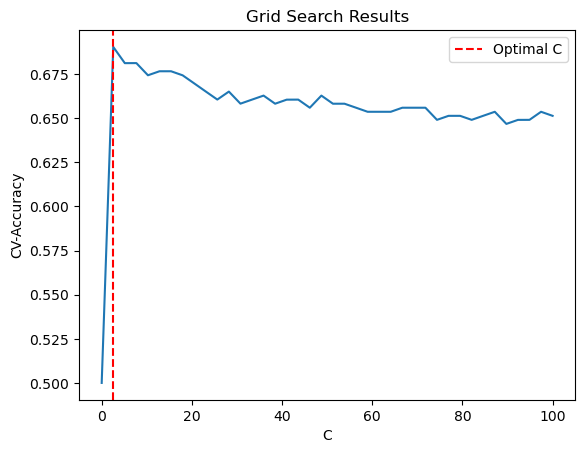

Mean Cross-Validation Precision: 0.6912442396313364
Mean Cross-Validation Recall: 0.6880733944954128


In [193]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score
# The code performs a grid search with cross-validation (5-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 5-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000) # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model, with the best C
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate precision and recall scores
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Precision:", precision)
print("Mean Cross-Validation Recall:", recall)

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246 (C=2.57).

In [194]:
len(y_pred)

436

### Compute the classification metrics on the cross-validation results 

In [195]:
# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.6904127481713689
Standard Deviation of Accuracy: 0.07706614947620034
Mean Cross-Validation Precision - 1: 0.6856916971916972
Standard Deviation of Precision - 1: 0.06309240904227945
Mean Cross-Validation Recall - 1: 0.6890063424947146
Standard Deviation of Recall - 1: 0.13613670745346432
Mean Cross-Validation F1-score - 1: 0.6843422314412388
Standard Deviation of F1-score - 1: 0.09868073001499751


In [196]:
precision_scores_1 

array([0.69230769, 0.75555556, 0.68      , 0.72916667, 0.57142857])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [197]:
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.7006449149306292
Standard Deviation of Precision - 0: 0.09344197263287148
Mean Cross-Validation Recall - 0: 0.6924947145877379
Standard Deviation of Recall - 0: 0.04336409396129484
Mean Cross-Validation F1-score: - 0 0.6936305858901848
Standard Deviation of F1-score: - 0 0.059634825570688776


In [198]:
precision_scores_0

array([0.65306122, 0.78571429, 0.75675676, 0.76923077, 0.53846154])

In [199]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

## Lasso on the test set 

In [128]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=2.57)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

Liblinear failed to converge, increase the number of iterations.


              precision    recall  f1-score   support

           0       0.72      0.86      0.79        73
           1       0.83      0.67      0.74        73

    accuracy                           0.77       146
   macro avg       0.78      0.77      0.76       146
weighted avg       0.78      0.77      0.76       146

Numero di feature con coefficiente diverso da zero: 197
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_270_282', 'GATA3_406_408', 'MAML3_503_503', 'AKT1_17_17',
       'GATA3_308_335', 'PIK3CA_1046_1047', 'PIK3CA_345_345', 'PIK3CA_102_113',
       'PIK3CA_545_546', 'TP53_191_199',
       ...
       'TARBP2_noClust', 'RAB42_noClust', 'SNAPC1_noClust', 'HSD3B2_noClust',
       'ELOVL5_noClust', 'GNL3L_noClust', 'TRIM6_noClust', 'NAA50_noClust',
       'FANK1_noClust', 'NAGK_noClust'],
      dtype='object', length=197)


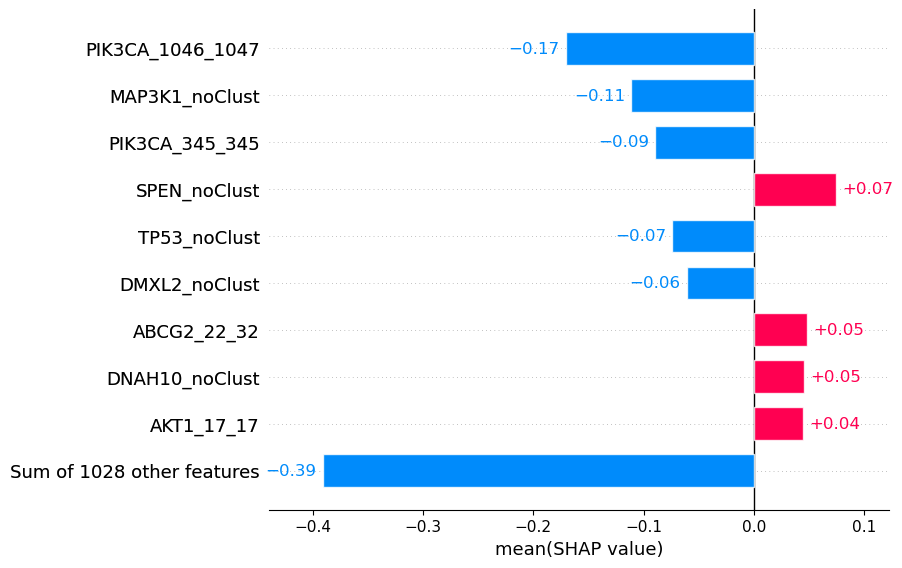

In [129]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

197 features have a coefficent different from zero.

### Study of the function Lasso

In [108]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=2.57)   

In [109]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [110]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [111]:
y_pred_simple_Lasso

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [112]:
y_test

BR-M-045               1
TCGA-A2-A0YE           1
TCGA-AN-A0AL           1
MBC_132                1
TCGA-OL-A5S0           1
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 146, dtype: int64

## Evaluate the model with classification metrics - Lasso Logistic Regression

In [113]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7671232876712328


In [114]:
cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[63 10]
 [24 49]]


In [115]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [116]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.8305084745762712


In [117]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [118]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.6712328767123288


In [119]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [120]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7424242424242425


In [121]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [122]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

49

In [123]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

63

In [124]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

10

In [125]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

24

In [126]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.5443509371017501


In [130]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_270_282',
 'GATA3_406_408',
 'MAML3_503_503',
 'AKT1_17_17',
 'GATA3_308_335',
 'PIK3CA_1046_1047',
 'PIK3CA_345_345',
 'PIK3CA_102_113',
 'PIK3CA_545_546',
 'TP53_191_199',
 'TP53_236_258',
 'TP53_173_177',
 'ZNF814_303_311',
 'DNAH14_143_288',
 'FAM208B_805_805',
 'ABCG2_22_32',
 'TP53_noClust',
 'PIK3CA_noClust',
 'TTN_noClust',
 'NF1_noClust',
 'ATP11A_noClust',
 'CDC20_noClust',
 'MMS22L_noClust',
 'KMT2C_noClust',
 'GPRIN1_noClust',
 'DNAH7_noClust',
 'CBFB_noClust',
 'ZNF546_noClust',
 'GATA3_noClust',
 'NOTCH2_noClust',
 'SPEN_noClust',
 'DNAH12_noClust',
 'ERBB2_noClust',
 'FAM171B_noClust',
 'MAP2K4_noClust',
 'EIF4G3_noClust',
 'ARHGAP5_noClust',
 'PODXL2_noClust',
 'TUBD1_noClust',
 'ACTN4_noClust',
 'LARP4B_noClust',
 'HIST1H3B_noClust',
 'SZT2_noClust',
 'NAV3_noClust',
 'SYNE1_noClust',
 'CALB2_noClust',
 'DOCK11_noClust',
 'INSRR_noClust',
 'ATRX_noClust',
 'NCOR1_noClust',
 'ASXL2_noClust',
 'OMA1_noClust',
 'MAP3K1_noClust',
 'ERBB3_noClust',
 'LAMP5_noClust',


In [131]:
feature_names_lista_simple_Lasso_df = pd.DataFrame({'Lasso features': feature_names_lista_simple_Lasso})
feature_names_lista_simple_Lasso_df

,Lasso features
0,TP53_270_282
1,GATA3_406_408
2,MAML3_503_503
3,AKT1_17_17
4,GATA3_308_335
...,...
192,GNL3L_noClust
193,TRIM6_noClust
194,NAA50_noClust
195,FANK1_noClust


#### Extract only the Hugo Symbol from the features 

In [224]:
feature_names_lista_simple_Lasso_df['Hugo_Symbol'] = feature_names_lista_simple_Lasso_df['Lasso features'].str.split('_').str[0]
feature_names_lista_simple_Lasso_df

,Lasso features,Hugo_Symbol
0,TP53_270_282,TP53
1,GATA3_406_408,GATA3
2,MAML3_503_503,MAML3
3,AKT1_17_17,AKT1
4,GATA3_308_335,GATA3
...,...,...
192,GNL3L_noClust,GNL3L
193,TRIM6_noClust,TRIM6
194,NAA50_noClust,NAA50
195,FANK1_noClust,FANK1


In [225]:
feature_names_lista_simple_Lasso_df_onlyHugo = feature_names_lista_simple_Lasso_df[['Hugo_Symbol']]
feature_names_lista_simple_Lasso_df_onlyHugo

,Hugo_Symbol
0,TP53
1,GATA3
2,MAML3
3,AKT1
4,GATA3
...,...
192,GNL3L
193,TRIM6
194,NAA50
195,FANK1


In [226]:
feature_names_lista_simple_Lasso_df_onlyHugo.duplicated().sum()

10

In [227]:
# consider just unique genes - drop duplicates 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup = feature_names_lista_simple_Lasso_df_onlyHugo.drop_duplicates()
feature_names_lista_simple_Lasso_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,GATA3
2,MAML3
3,AKT1
5,PIK3CA
...,...
192,GNL3L
193,TRIM6
194,NAA50
195,FANK1


In [228]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.to_csv('1A_features_onlygenes_LASSO_v5.txt', index=False, sep='\t')

In [229]:
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.loc[feature_names_lista_simple_Lasso_df_onlyHugo_nodup['Hugo_Symbol']=='BRCA1']

,Hugo_Symbol


In [230]:
feature_names_lista_simple_Lasso_onlyHugo_nodup = feature_names_lista_simple_Lasso_df_onlyHugo_nodup['Hugo_Symbol'].to_list()
feature_names_lista_simple_Lasso_onlyHugo_nodup

['TP53',
 'GATA3',
 'MAML3',
 'AKT1',
 'PIK3CA',
 'ZNF814',
 'DNAH14',
 'FAM208B',
 'ABCG2',
 'TTN',
 'NF1',
 'ATP11A',
 'CDC20',
 'MMS22L',
 'KMT2C',
 'GPRIN1',
 'DNAH7',
 'CBFB',
 'ZNF546',
 'NOTCH2',
 'SPEN',
 'DNAH12',
 'ERBB2',
 'FAM171B',
 'MAP2K4',
 'EIF4G3',
 'ARHGAP5',
 'PODXL2',
 'TUBD1',
 'ACTN4',
 'LARP4B',
 'HIST1H3B',
 'SZT2',
 'NAV3',
 'SYNE1',
 'CALB2',
 'DOCK11',
 'INSRR',
 'ATRX',
 'NCOR1',
 'ASXL2',
 'OMA1',
 'MAP3K1',
 'ERBB3',
 'LAMP5',
 'EPHB2',
 'WDR44',
 'CREBBP',
 'CDKN2A',
 'FERMT2',
 'TRIP11',
 'CYHR1',
 'GPR119',
 'ZNF764',
 'EPG5',
 'NXPE3',
 'PPP1R9A',
 'OR4X2',
 'KIAA1614',
 'ALK',
 'FOXP1',
 'NUP188',
 'KIAA0195',
 'USP9X',
 'TAF7L',
 'LOR',
 'XRN1',
 'ANKHD1',
 'HPD',
 'DNAH10',
 'STAG2',
 'MBD5',
 'TOP3A',
 'KLK2',
 'NLRP2',
 'PIK3R1',
 'OCSTAMP',
 'CCAR1',
 'SPPL3',
 'EML5',
 'HERC1',
 'ANKRD12',
 'PNMAL1',
 'NAA15',
 'DMXL2',
 'TMEM132C',
 'ACAN',
 'RIF1',
 'GPC3',
 'LEF1',
 'ZBTB48',
 'KL',
 'ZNF106',
 'EGR3',
 'NCOA6',
 'PPIL2',
 'TSC1',
 'SLAMF9',

In [231]:
len(feature_names_lista_simple_Lasso_onlyHugo_nodup)

187

In [232]:
len(feature_names_lista_simple_Lasso)

197

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  0.01
Best cross-validation score:  0.6973092998955068


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

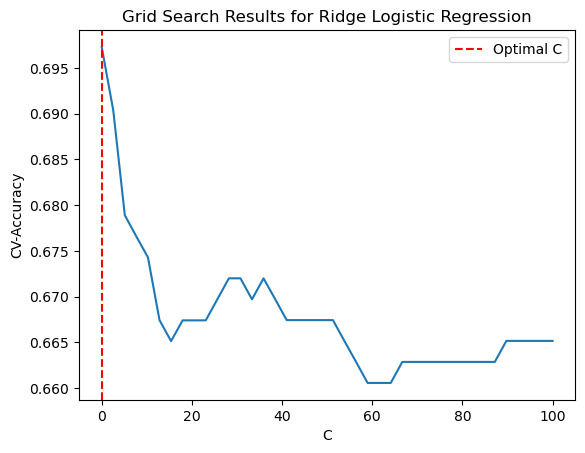

In [233]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 100 (C=0.01).

### Compute the classification metrics on the cross-validation results 

In [234]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.6973092998955068
Standard Deviation of Accuracy: 0.04585421642267687
Mean Cross-Validation Precision - 1: 0.6683718941616495
Standard Deviation of Precision - 1: 0.026822136495723497
Mean Cross-Validation Recall - 1: 0.7805496828752643
Standard Deviation of Recall - 1: 0.0957353771499276
Mean Cross-Validation F1-score - 1: 0.7184125941058996
Standard Deviation of F1-score - 1: 0.05125100211189245


In [235]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7477083891718039
Standard Deviation of Precision - 0: 0.09759862106594612
Mean Cross-Validation Recall - 0: 0.6147991543340382
Standard Deviation of Recall - 0: 0.03501704294131745
Mean Cross-Validation F1-score: - 0 0.6711806487332178
Standard Deviation of F1-score: - 0 0.039212666633408756


## Ridge on the test set

In [236]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        73
           1       0.80      0.64      0.71        73

    accuracy                           0.74       146
   macro avg       0.75      0.74      0.74       146
weighted avg       0.75      0.74      0.74       146

Numero di feature con coefficiente diverso da zero: 997
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_270_282', 'GATA3_406_408', 'MAML3_503_503', 'AKT1_17_17',
       'MYL10_26_26', 'PIK3R1_566_578', 'NUP93_14_15', 'ZKSCAN1_270_270',
       'GATA3_308_335', 'PIK3CA_1046_1047',
       ...
       'FAM153A_noClust', 'GOLT1A_noClust', 'SNAP23_noClust',
       'PSTPIP2_noClust', 'LSM2_noClust', 'FOXR1_noClust', 'HCRT_noClust',
       'FUT1_noClust', 'PFDN5_noClust', 'KRTAP5-1_noClust'],
      dtype='object', length=997)


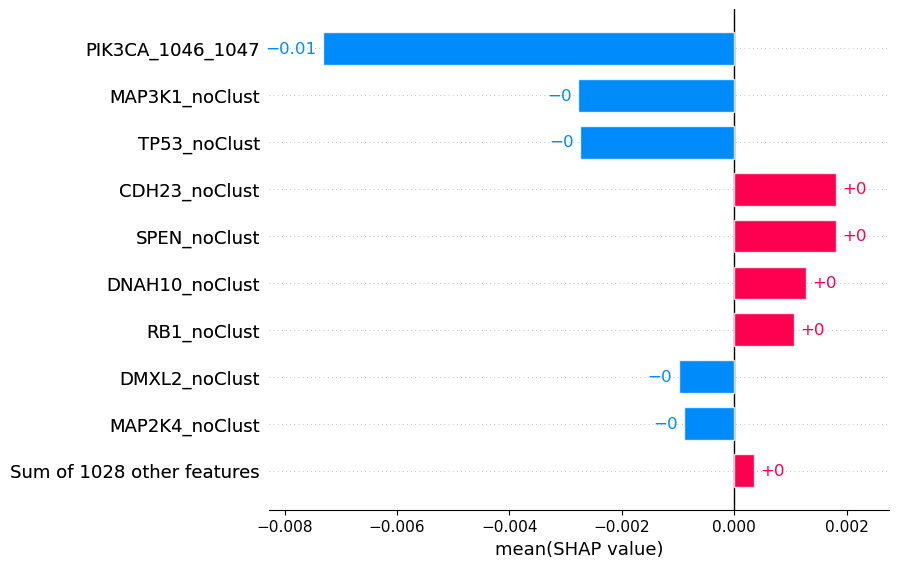

In [237]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [238]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

In [239]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=0.01, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [240]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [241]:
y_pred_simple_Ridge

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [242]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7397260273972602


In [243]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[61 12]
 [26 47]]


In [245]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.7966101694915254


In [246]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.6438356164383562


In [247]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.712121212121212


In [248]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

47

In [249]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

61

In [250]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

12

In [251]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

26

In [252]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.48852007175798084


# Full Logistic Regression

## Cross-validation

In [254]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty=None)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.64772727 0.66666667 0.67816092 0.63218391 0.63218391]
Mean CV Accuracy: 0.6513845350052246


In [255]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.6513845350052246
Standard Deviation of Accuracy: 0.018445715142060587
Mean Cross-Validation Precision - 1: 0.6653479519691858
Standard Deviation of Precision - 1: 0.02082828883093316
Mean Cross-Validation Recall - 1: 0.6150105708245244
Standard Deviation of Recall - 1: 0.059642873961557215
Mean Cross-Validation F1-score - 1: 0.6369383298965567
Standard Deviation of F1-score - 1: 0.02901205639634621


In [256]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.6425659832936771
Standard Deviation of Precision - 0: 0.025687223520541407
Mean Cross-Validation Recall - 0: 0.6878435517970403
Standard Deviation of Recall - 0: 0.05722869060450857
Mean Cross-Validation F1-score: - 0 0.6626306334027267
Standard Deviation of F1-score: - 0 0.027410026537544672


## Full Logistic Regression on the test set 

In [259]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty=None) 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [260]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        73
           1       0.84      0.67      0.75        73

    accuracy                           0.77       146
   macro avg       0.79      0.77      0.77       146
weighted avg       0.79      0.77      0.77       146



### Study of the full logistic regression function

In [265]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty=None)

In [266]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty=None, solver='newton-cg')

In [267]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [268]:
y_pred_full_logreg

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics - Full Logistic Regression

In [269]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.773972602739726


In [270]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[64  9]
 [24 49]]


In [274]:
print("Precision ", precision(cm_full_logreg))

Precision  0.8448275862068966


In [275]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.6712328767123288


In [276]:
print("F1:", f1(cm_full_logreg))

F1: 0.7480916030534351


In [277]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

49

In [278]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

64

In [279]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

9

In [280]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

24

In [281]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.5598925109558544


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 2.5738461538461537
Best cv accuracy: 0.6399164054336468


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

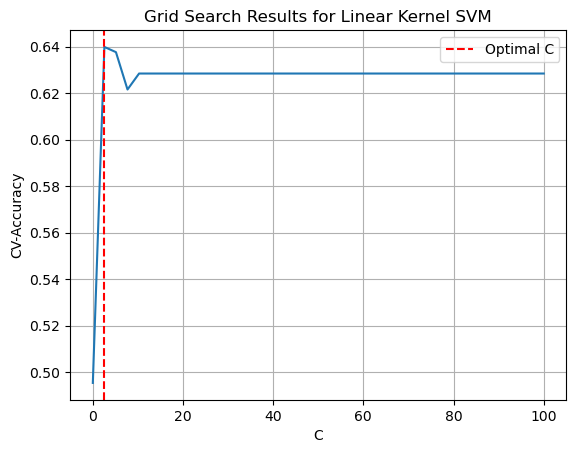

In [282]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 2.57

### Compute the classification metrics on the cross-validation results

In [283]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.6399164054336468
Standard Deviation of Accuracy: 0.04265883223244254
Mean Cross-Validation Precision - 1: 0.6508931381610171
Standard Deviation of Precision - 1: 0.043650520220678106
Mean Cross-Validation Recall - 1: 0.6105708245243129
Standard Deviation of Recall - 1: 0.06648485608916663
Mean Cross-Validation F1-score - 1: 0.6280664016552984
Standard Deviation of F1-score - 1: 0.04679007447589454


In [284]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.6326809606966382
Standard Deviation of Precision - 0: 0.04368481117458478
Mean Cross-Validation Recall - 0: 0.6692389006342495
Standard Deviation of Recall - 0: 0.07311878369852291
Mean Cross-Validation F1-score: - 0 0.6486840568774126
Standard Deviation of F1-score: - 0 0.05081630302652492


# Linear SVM on the test set 

In [285]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=2.57)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [286]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        73
           1       0.84      0.66      0.74        73

    accuracy                           0.77       146
   macro avg       0.78      0.77      0.76       146
weighted avg       0.78      0.77      0.76       146



### Study of the Linear SVM function

In [287]:
clf_linear_svm = SVC(kernel='linear', C=2.57)

In [288]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=2.57, kernel='linear')

In [289]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [290]:
y_pred_linear_svm

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [291]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7671232876712328


In [292]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[64  9]
 [25 48]]


In [293]:
print("Precision ", precision(cm_linear_svm))

Precision  0.8421052631578947


In [294]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.6575342465753424


In [295]:
print("F1:", f1(cm_linear_svm))

F1: 0.7384615384615385


In [296]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

48

In [297]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

64

In [298]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

9

In [299]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

25

In [300]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.5475605812906217


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [301]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 0.001
Best degree: 4
Best coef0: 5.0
Best cv accuracy: 0.6950888192267503


### Compute the classification metrics on the cross-validation results

In [302]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.6950888192267503
Standard Deviation of Accuracy: 0.09186468539482279
Mean Cross-Validation Precision - 1: 0.717242912126633
Standard Deviation of Precision - 1: 0.08058745369093863
Mean Cross-Validation Recall - 1: 0.6295983086680762
Standard Deviation of Recall - 1: 0.14864827103047312
Mean Cross-Validation F1-score - 1: 0.6668015187584105
Standard Deviation of F1-score - 1: 0.11781491817359431


In [303]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.6817528060611461
Standard Deviation of Precision - 0: 0.09946866192586186
Mean Cross-Validation Recall - 0: 0.7608879492600422
Standard Deviation of Recall - 0: 0.05430626711916775
Mean Cross-Validation F1-score: - 0 0.7168388540182336
Standard Deviation of F1-score: - 0 0.07388829026870644


## Polynomial SVM on the test set 

In [304]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=4, coef0=5)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [305]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        73
           1       0.84      0.63      0.72        73

    accuracy                           0.75       146
   macro avg       0.77      0.75      0.75       146
weighted avg       0.77      0.75      0.75       146



### Study of the Polynomial SVM function

In [306]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=4, coef0=5)

In [307]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=0.001, coef0=5, degree=4, kernel='poly')

In [308]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [309]:
y_pred_poly_svm

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [310]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.7534246575342466


In [311]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[64  9]
 [27 46]]


In [314]:
print("Precision ", precision(cm_poly_svm))

Precision  0.8363636363636363


In [315]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.6301369863013698


In [316]:
print("F1:", f1(cm_poly_svm))

F1: 0.71875


In [317]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

46

In [318]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

64

In [319]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

9

In [320]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

27

In [321]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.5229975846277624


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [322]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 50.000499999999995
Best gamma: 0.001
Best cv accuracy: 0.6972570532915361


### Compute the classification metrics on the cross-validation results

In [323]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.6972570532915361
Standard Deviation of Accuracy: 0.0728607131966517
Mean Cross-Validation Precision - 1: 0.7046587457209563
Standard Deviation of Precision - 1: 0.06675883495285775
Mean Cross-Validation Recall - 1: 0.6749471458773784
Standard Deviation of Recall - 1: 0.09666497407663056
Mean Cross-Validation F1-score - 1: 0.6886183891192992
Standard Deviation of F1-score - 1: 0.0809203308250909


In [324]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.6918571478850224
Standard Deviation of Precision - 0: 0.07879961158130765
Mean Cross-Validation Recall - 0: 0.719661733615222
Standard Deviation of Recall - 0: 0.05931975263339867
Mean Cross-Validation F1-score: - 0 0.7047320587339813
Standard Deviation of F1-score: - 0 0.06691364849768033


### Radial SVM on the test set 

In [325]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=50, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [326]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        73
           1       0.80      0.66      0.72        73

    accuracy                           0.75       146
   macro avg       0.75      0.75      0.74       146
weighted avg       0.75      0.75      0.74       146



### Study of the Radial SVM function

In [327]:
clf_radial_svm = SVC(kernel='rbf', C=50, gamma=0.001)

In [328]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=50, gamma=0.001)

In [329]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [330]:
y_pred_radial_svm

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [331]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7465753424657534


In [332]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[61 12]
 [25 48]]


In [334]:
print("Precision ", precision(cm_radial_svm))

Precision  0.8


In [335]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.6575342465753424


In [336]:
print("F1:", f1(cm_radial_svm))

F1: 0.7218045112781954


In [337]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

48

In [338]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

61

In [339]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

12

In [340]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

25

In [341]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.5011614417507341


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [342]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 33, 'n_estimators': 400}
Best cross-validation score (accuracy): 0.7226489028213167
OOB score of best model: 0.7293577981651376


### Compute the classification metrics on the cross-validation results 

In [343]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.7226489028213167
Standard Deviation of Accuracy: 0.06170784000430549
Mean Cross-Validation Precision - 1: 0.7155138831778735
Standard Deviation of Precision - 1: 0.03731616775810354
Mean Cross-Validation Recall - 1: 0.7350951374207189
Standard Deviation of Recall - 1: 0.1263252894200349
Mean Cross-Validation F1-score - 1: 0.7213915582525157
Standard Deviation of F1-score - 1: 0.07682579128382293


In [344]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.7400695393427483
Standard Deviation of Precision - 0: 0.09685143501838635
Mean Cross-Validation Recall - 0: 0.7109936575052853
Standard Deviation of Recall - 0: 0.042849538382902716
Mean Cross-Validation F1-score: - 0 0.7213432481909706
Standard Deviation of F1-score: - 0 0.050036794002732775


In [345]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=33, n_estimators=400, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [346]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79        73
           1       0.83      0.71      0.76        73

    accuracy                           0.78       146
   macro avg       0.79      0.78      0.78       146
weighted avg       0.79      0.78      0.78       146



### Study the Random Forest function

In [347]:
clf_rf = RandomForestClassifier(max_features=33, n_estimators=400, random_state=123)

In [348]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=33, n_estimators=400, random_state=123)

In [349]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [350]:
y_pred_rf

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [351]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7808219178082192


In [352]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[62 11]
 [21 52]]


In [353]:
print("Precision ", precision(cm_rf))

Precision  0.8253968253968254


In [354]:
print("Recall:", recall(cm_rf))

Recall: 0.7123287671232876


In [355]:
print("F1:", f1(cm_rf))

F1: 0.7647058823529411


In [356]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

52

In [357]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

62

In [358]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

11

In [359]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

21

In [360]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.566988872657432


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [361]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 6, 8, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Best Learning Rate: 0.1
Best Max Depth: 5
Best Number of Trees: 100
Best Accuracy: 0.736337513061651


### Compute the classification metrics on the cross-validation results 

In [362]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.736337513061651
Standard Deviation of Accuracy: 0.06329582811366216
Mean Cross-Validation Precision - 1: 0.7260688463583201
Standard Deviation of Precision - 1: 0.04561798665638096
Mean Cross-Validation Recall - 1: 0.7529598308668076
Standard Deviation of Recall - 1: 0.10696117929033572
Mean Cross-Validation F1-score - 1: 0.737608251452912
Standard Deviation of F1-score - 1: 0.07455231052144258


In [363]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.7517935298666195
Standard Deviation of Precision - 0: 0.08490252667089122
Mean Cross-Validation Recall - 0: 0.7201902748414376
Standard Deviation of Recall - 0: 0.033346888646645235
Mean Cross-Validation F1-score: - 0 0.7338716369006104
Standard Deviation of F1-score: - 0 0.05306150803901815


In [364]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=5, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [365]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        73
           1       0.85      0.71      0.78        73

    accuracy                           0.79       146
   macro avg       0.80      0.79      0.79       146
weighted avg       0.80      0.79      0.79       146



### Study the eXtreme Gradient Boosting function

In [366]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=5, random_state=123) 

In [367]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [368]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [369]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.7945205479452054


In [370]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[64  9]
 [21 52]]


In [371]:
print("Precision ", precision(cm_xgb))

Precision  0.8524590163934426


In [372]:
print("Recall:", recall(cm_xgb))

Recall: 0.7123287671232876


In [373]:
print("F1:", f1(cm_xgb))

F1: 0.7761194029850746


In [374]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

52

In [375]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

64

In [376]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

9

In [377]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

21

In [378]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.5971646281025819
